<a href="https://colab.research.google.com/github/euclideands/Programming_Dumps/blob/main/LDA_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install & Import Packages**

In [2]:
install.packages("readr")
install.packages("HSAUR2")
install.packages("MVA")
# Data visualization
install.packages("ggplot2")
# Split train and test data
install.packages("caret")
# LDA model
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library("readr")
library("HSAUR2")
library("tools")
library("MVA")
# Data visualization
library("ggplot2")
# Split train and test data
library("caret")
# LDA model
library("MASS")

Loading required package: tools

Loading required package: lattice



# **Load Dataset**

In [4]:
url <- "https://raw.githubusercontent.com/QuantLet/MVA/master/QID-2298-MVAboxbhd/bostonh.dat"

# Read the dataset from the URL and specify column names
df <- read.table(url)

# Rename the columns
col_names <- c()
for (i in 1:ncol(df)) {
  col_names <- c(col_names, paste("x", i, sep = ""))
}
colnames(df) <- col_names

# View the first few rows of the dataset
head(df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


- x1 : crim : per capita crime rate by town
- x2 : zn : proportion of residential land zoned for lots over 25,000 sq.ft
- x3 : indus	: proportion of non-retail business acres per town
- x4 : chas : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- x5 : nox	: nitric oxides concentration (parts per 10 million)
- x6 : rm	: average number of rooms per dwelling
- x7 : age	: proportion of owner-occupied units built prior to 1940
- x8 : dis	: weighted distances to five Boston employment centres
- x9 : rad	: index of accessibility to radial highways
- x10: tax	: full-value property-tax rate per USD 10,000
- x11 : ptratio	: pupil-teacher ratio by town
- x12 : b : $1000(B-0.63)^2$ where B is the proportion of blacks (African American) by town
- x13 : lstat	: percentage of lower status of the population
- x14 : medv : median value of owner-occupied homes in USD 1000's

# **Data Cleaning**

In [5]:
# Check for null values in a dataframe
null_values <- is.na(df)

# Sum the null values in each column
col_null_counts <- colSums(null_values)

# Display the number of null values in each column
print(col_null_counts)

# # Remove rows with null values from the dataframe
# df <- na.omit(df)

 x1  x2  x3  x4  x5  x6  x7  x8  x9 x10 x11 x12 x13 x14 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 


In [6]:
# Check for duplicates in the entire dataframe
duplicates <- duplicated(df)

# Display the rows with duplicate values
print(df[duplicates, ])

# # Remove duplicates and keep the first occurrence
# df <- unique(df)

 [1] x1  x2  x3  x4  x5  x6  x7  x8  x9  x10 x11 x12 x13 x14
<0 rows> (or 0-length row.names)


# **Preprocessing & EDA**

## Distribusi Data

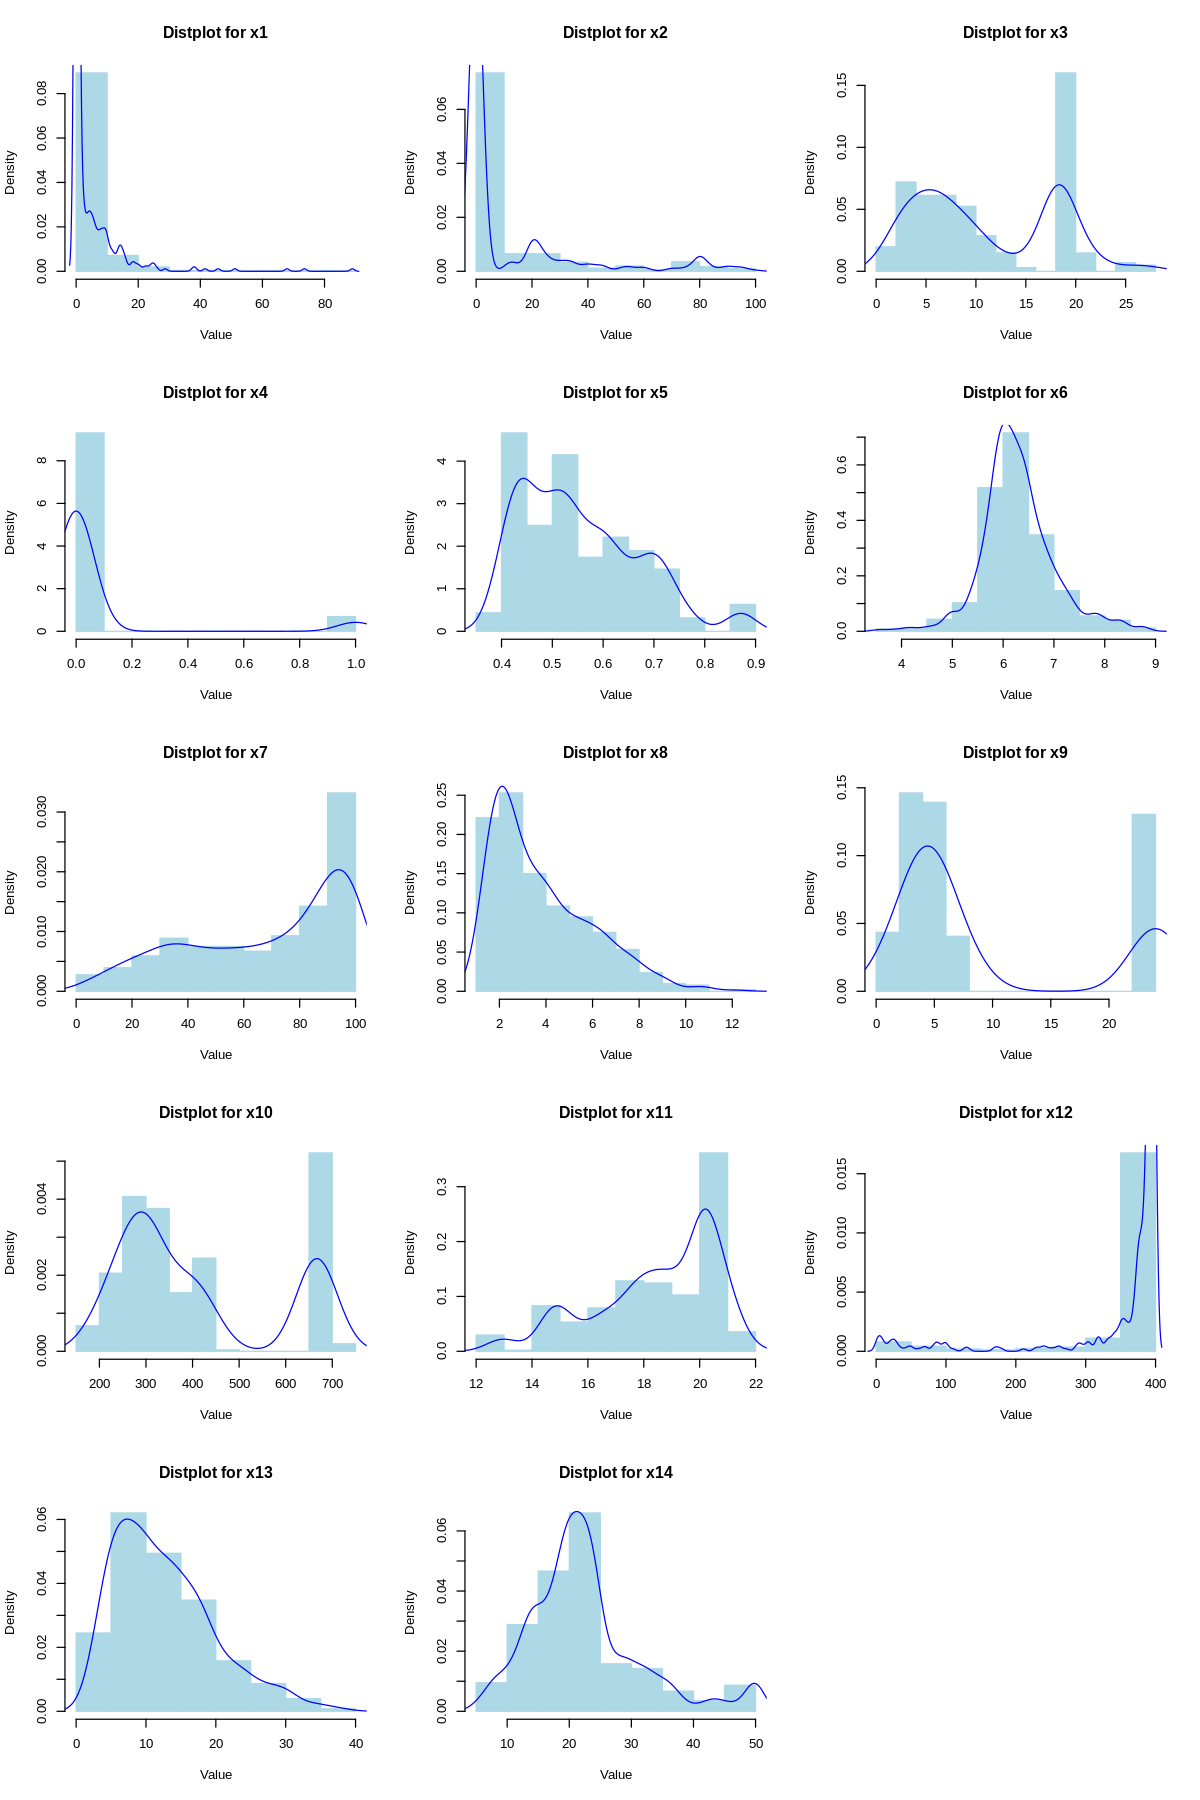

In [7]:
# Set the number of rows and columns for the grid
num_rows <- 5
num_cols <- 3

# Set the plot size
options(repr.plot.width = 10, repr.plot.height = 15)

# Create a 4x3 grid of subplots
par(mfrow = c(num_rows, num_cols))

# Get all numeric columns from the data frame df
numeric_columns <- df[, sapply(df, is.numeric)]

# Loop through the numeric columns and create density plots with histograms
for (i in 1:ncol(numeric_columns)) {
  col_name <- names(numeric_columns)[i]
  col_data <- numeric_columns[, i]

  # Create the histogram
  hist(col_data, col = "lightblue", border = "lightblue", prob = TRUE,
  xlab = "Value", main = paste("Distplot for", col_name))

  # Create the density plot
  density_values <- density(col_data)
  lines(density_values, col = "blue")
}

Observasi:

Terlihat bahwa sebagian besar variabel distribusinya negative skew atau left-skewed maka perlu dilakukan transformasi untuk membuat distribusinya menjadi normal. Berikut transformasi yang diusulkan:
- $x_1 = log(x_1)$
- $x_2 = \frac{x_2}{10}$
- $x_3 = log(x_3)$
- $x_5 = log(x_5)$
- $x_6 = log(x_6)$
- $x_7 = \frac{x{_{7}}^{2.5}}{10000}$
- $x_8 = log(x_8)$
- $x_9 = log(x_9)$
- $x_{10} = log(x_{10})$
- $x_{11} = \frac{{e}^{0.4.x_{11}}}{1000}$
- $x_{12} = \frac{x_{12}}{100}$
- $x_{13} = \sqrt{x_{13}}$
- $x_{14} = log(x_{14})$

Sedangkan $x_4$ tidak dilakukan transformasi karena nilainya binary (kategorikal).

In [8]:
transformed_df <- df

# Perform transformations
transformed_df[, 1] <- log(df[, 1])
transformed_df[, 2] <- df[, 2] / 10
transformed_df[, 3] <- log(df[, 3])
transformed_df[, 5] <- log(df[, 5])
transformed_df[, 6] <- log(df[, 6])
transformed_df[, 7] <- (df[, 7] ^ (2.5)) / 10000
transformed_df[, 8] <- log(df[, 8])
transformed_df[, 9] <- log(df[, 9])
transformed_df[, 10] <- log(df[, 10])
transformed_df[, 11] <- exp(0.4 * df[, 11]) / 1000
transformed_df[, 12] <- df[, 12] / 100
transformed_df[, 13] <- sqrt(df[, 13])
transformed_df[, 14] <- log(as.numeric(df[, 14]))

In [9]:
# transformation = cbind(
#   log(df[, 1]), (df[, 2]/10), log(df[, 3]), df[, 4], log(df[, 5]), log(df[, 6]),
#   (df[, 7]^(2.5))/10000, log(df[, 8]), log(df[, 9]), log(df[, 10]),
#   (exp(0.4 * df[, 11]))/1000, (df[, 12])/100, sqrt(df[, 13]), log(df[, 14])
# )

# transformed_df = df

# i  = 1
# while (i <= 14) {
#     transformed_df[, i] = (transformation[, i] - mean(transformation[, i]))/(sqrt(var(transformation[, i])))
#     i = i + 1
# }

## Skala Data

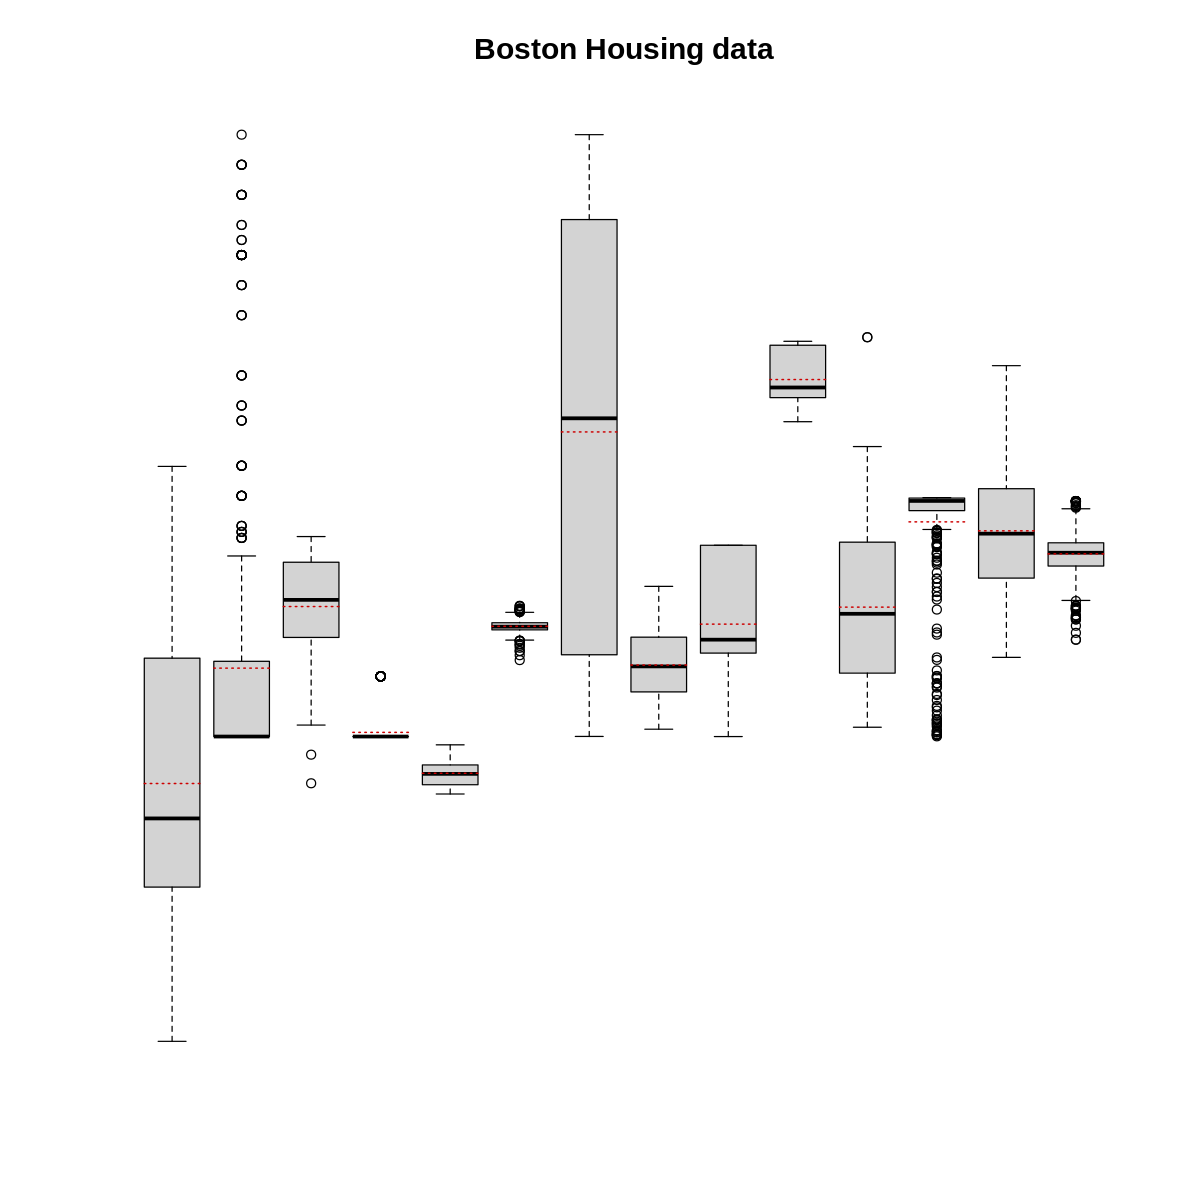

In [10]:
# Boxplot
options(repr.plot.width = 10, repr.plot.height = 10)

boxplot(transformed_df, at = 1:14, axes = FALSE, main = "Boston Housing data", cex.main = 1.5)

for (i in 1:14) {
    lines(c(i - 0.4, i + 0.4), c(mean(transformed_df[, i]), mean(transformed_df[, i])), col = "red3", lty = "dotted",
        lwd = 1.2)
}

Observasi:

Variabel-variabel dalam data ini memiliki rentang (skala) yang berbeda-beda. Jika kita tidak menyesuaikan skala ini, maka dapat memengaruhi hasil model machine learning. Oleh karena itu, kita melakukan standardisasi menggunakan z-score (nilai z) untuk membuat semua variabel memiliki skala yang seragam. Ini membantu model machine learning bekerja lebih baik dengan data tersebut.

In [11]:
# Standardization using z-score
standardized_df <- scale(transformed_df)

In [12]:
# Convert to data frame
standardized_df <- as.data.frame(standardized_df)

## Visualisasi Sebelum-Sesudah Scaling

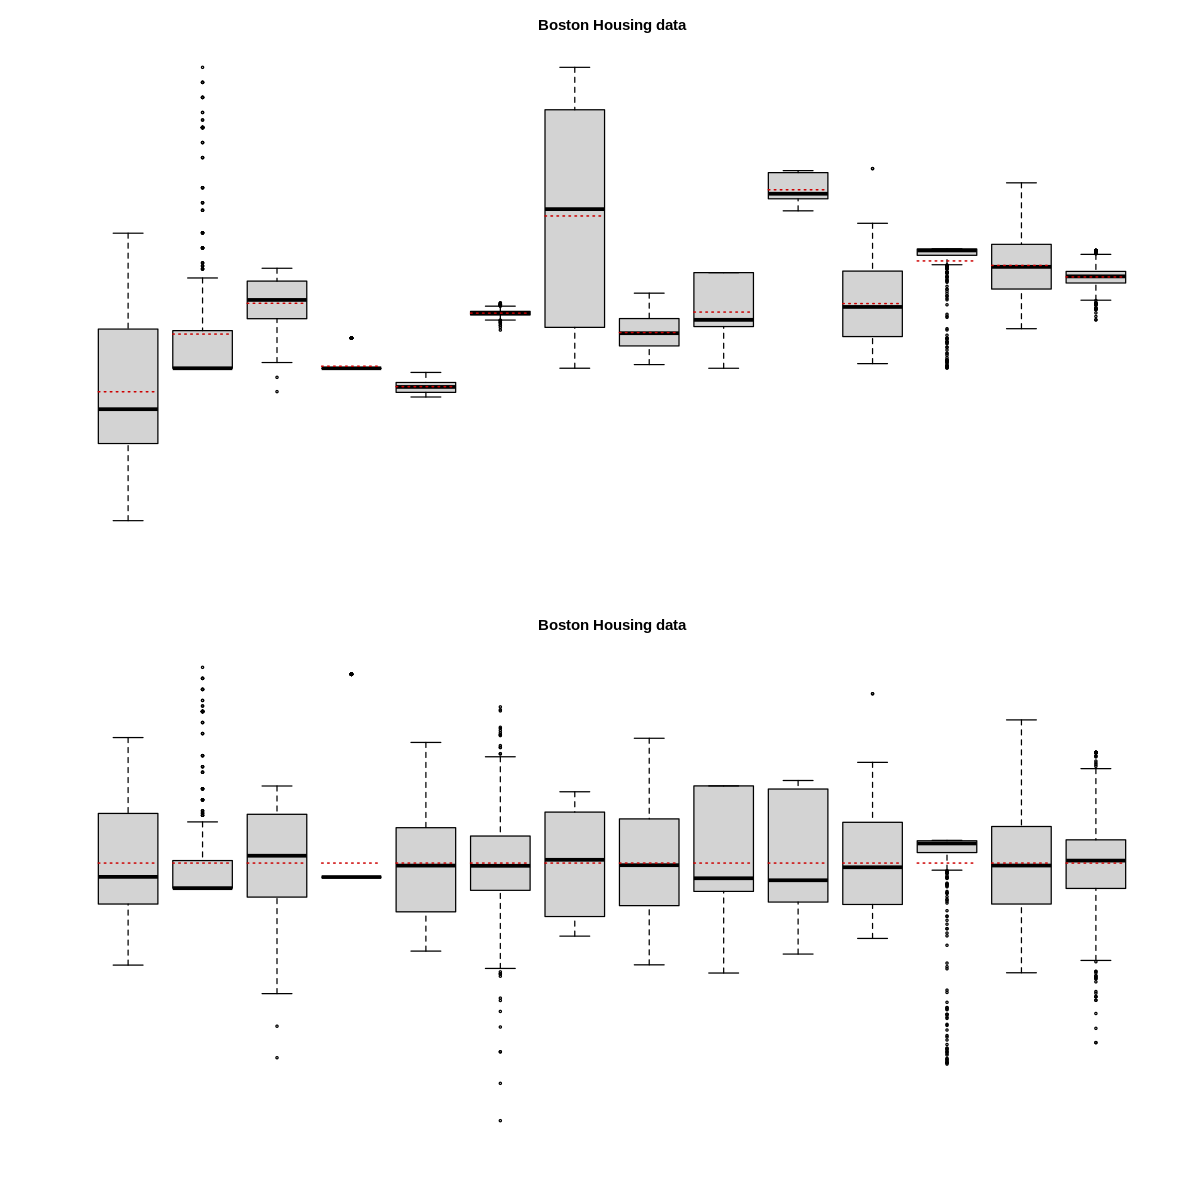

In [13]:
# Boxplot
par(mfrow = c(2, 1), ask = FALSE, cex = 0.5)

boxplot(transformed_df, at = 1:14, axes = FALSE, main = "Boston Housing data", cex.main = 1.5)

for (i in 1:14) {
    lines(c(i - 0.4, i + 0.4), c(mean(transformed_df[, i]), mean(transformed_df[, i])), col = "red3", lty = "dotted",
        lwd = 1.2)
}

boxplot(standardized_df, at = 1:14, axes = FALSE, main = "Boston Housing data", cex.main = 1.5)

for (i in 1:14) {
    lines(c(i - 0.4, i + 0.4), c(mean(standardized_df[, i]), mean(standardized_df[, i])), col = "red3", lty = "dotted",
        lwd = 1.2)
}

## Scatterplot Matrix

Jadi, kita punya data tentang harga rumah di berbagai distrik di Boston. Kita mau tahu apa yang memengaruhi harga rumah di distrik-distrik itu. Kita bagi distrik-distrik ini jadi dua kelompok:

1. Kelompok pertama (Π1) berisi distrik-distrik dengan harga rumah di atas atau sama dengan harga tengah di sana (median).
2. Kelompok kedua (Π2) berisi distrik-distrik dengan harga rumah di bawah harga tengah (median).

Dengan cara ini, kita bisa lihat perbedaan apa yang membuat harga rumah beda di kedua kelompok ini. Misalnya, mungkin lokasi, ukuran rumah, atau faktor-faktor lain yang mempengaruhi. Informasi ini berguna untuk mengidentifikasi distrik yang mungkin lebih mahal atau lebih murah berdasarkan faktor-faktor ini.

In [14]:
df = standardized_df

In [15]:
replacement_values <- ifelse(df$x14 >= median(df$x14), 1, 2)
df$x14 <- replacement_values
head(df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.9812674,0.2845483,-1.7026586,-0.2723291,-0.04899171,0.4576943,-0.4565267,0.4086998,-2.1348765,-0.6081371,-1.2427973,0.4406159,-1.2015004,1
2,-1.3043481,-0.4872402,-0.2629788,-0.2723291,-0.73021967,0.2466931,0.1314421,0.7688007,-1.3425573,-1.1163074,-0.6697918,0.4406159,-0.3995573,1
3,-1.3046869,-0.4872402,-0.2629788,-0.2723291,-0.73021967,1.2475534,-0.6007692,0.7688007,-1.3425573,-1.1163074,-0.6697918,0.3960351,-1.4285190,1
4,-1.2257286,-0.4872402,-1.7772063,-0.2723291,-0.84801420,1.0127782,-1.0209311,1.1380675,-0.8790803,-1.3339352,-0.2769868,0.4157514,-1.7251690,1
5,-0.8753211,-0.4872402,-1.7772063,-0.2723291,-0.84801420,1.2003437,-0.8125735,1.1380675,-0.8790803,-1.3339352,-0.2769868,0.4406159,-1.1234103,1
6,-1.2632149,-0.4872402,-1.7772063,-0.2723291,-0.84801420,0.2591629,-0.6787640,1.1380675,-0.8790803,-1.3339352,-0.2769868,0.4101651,-1.1498869,1


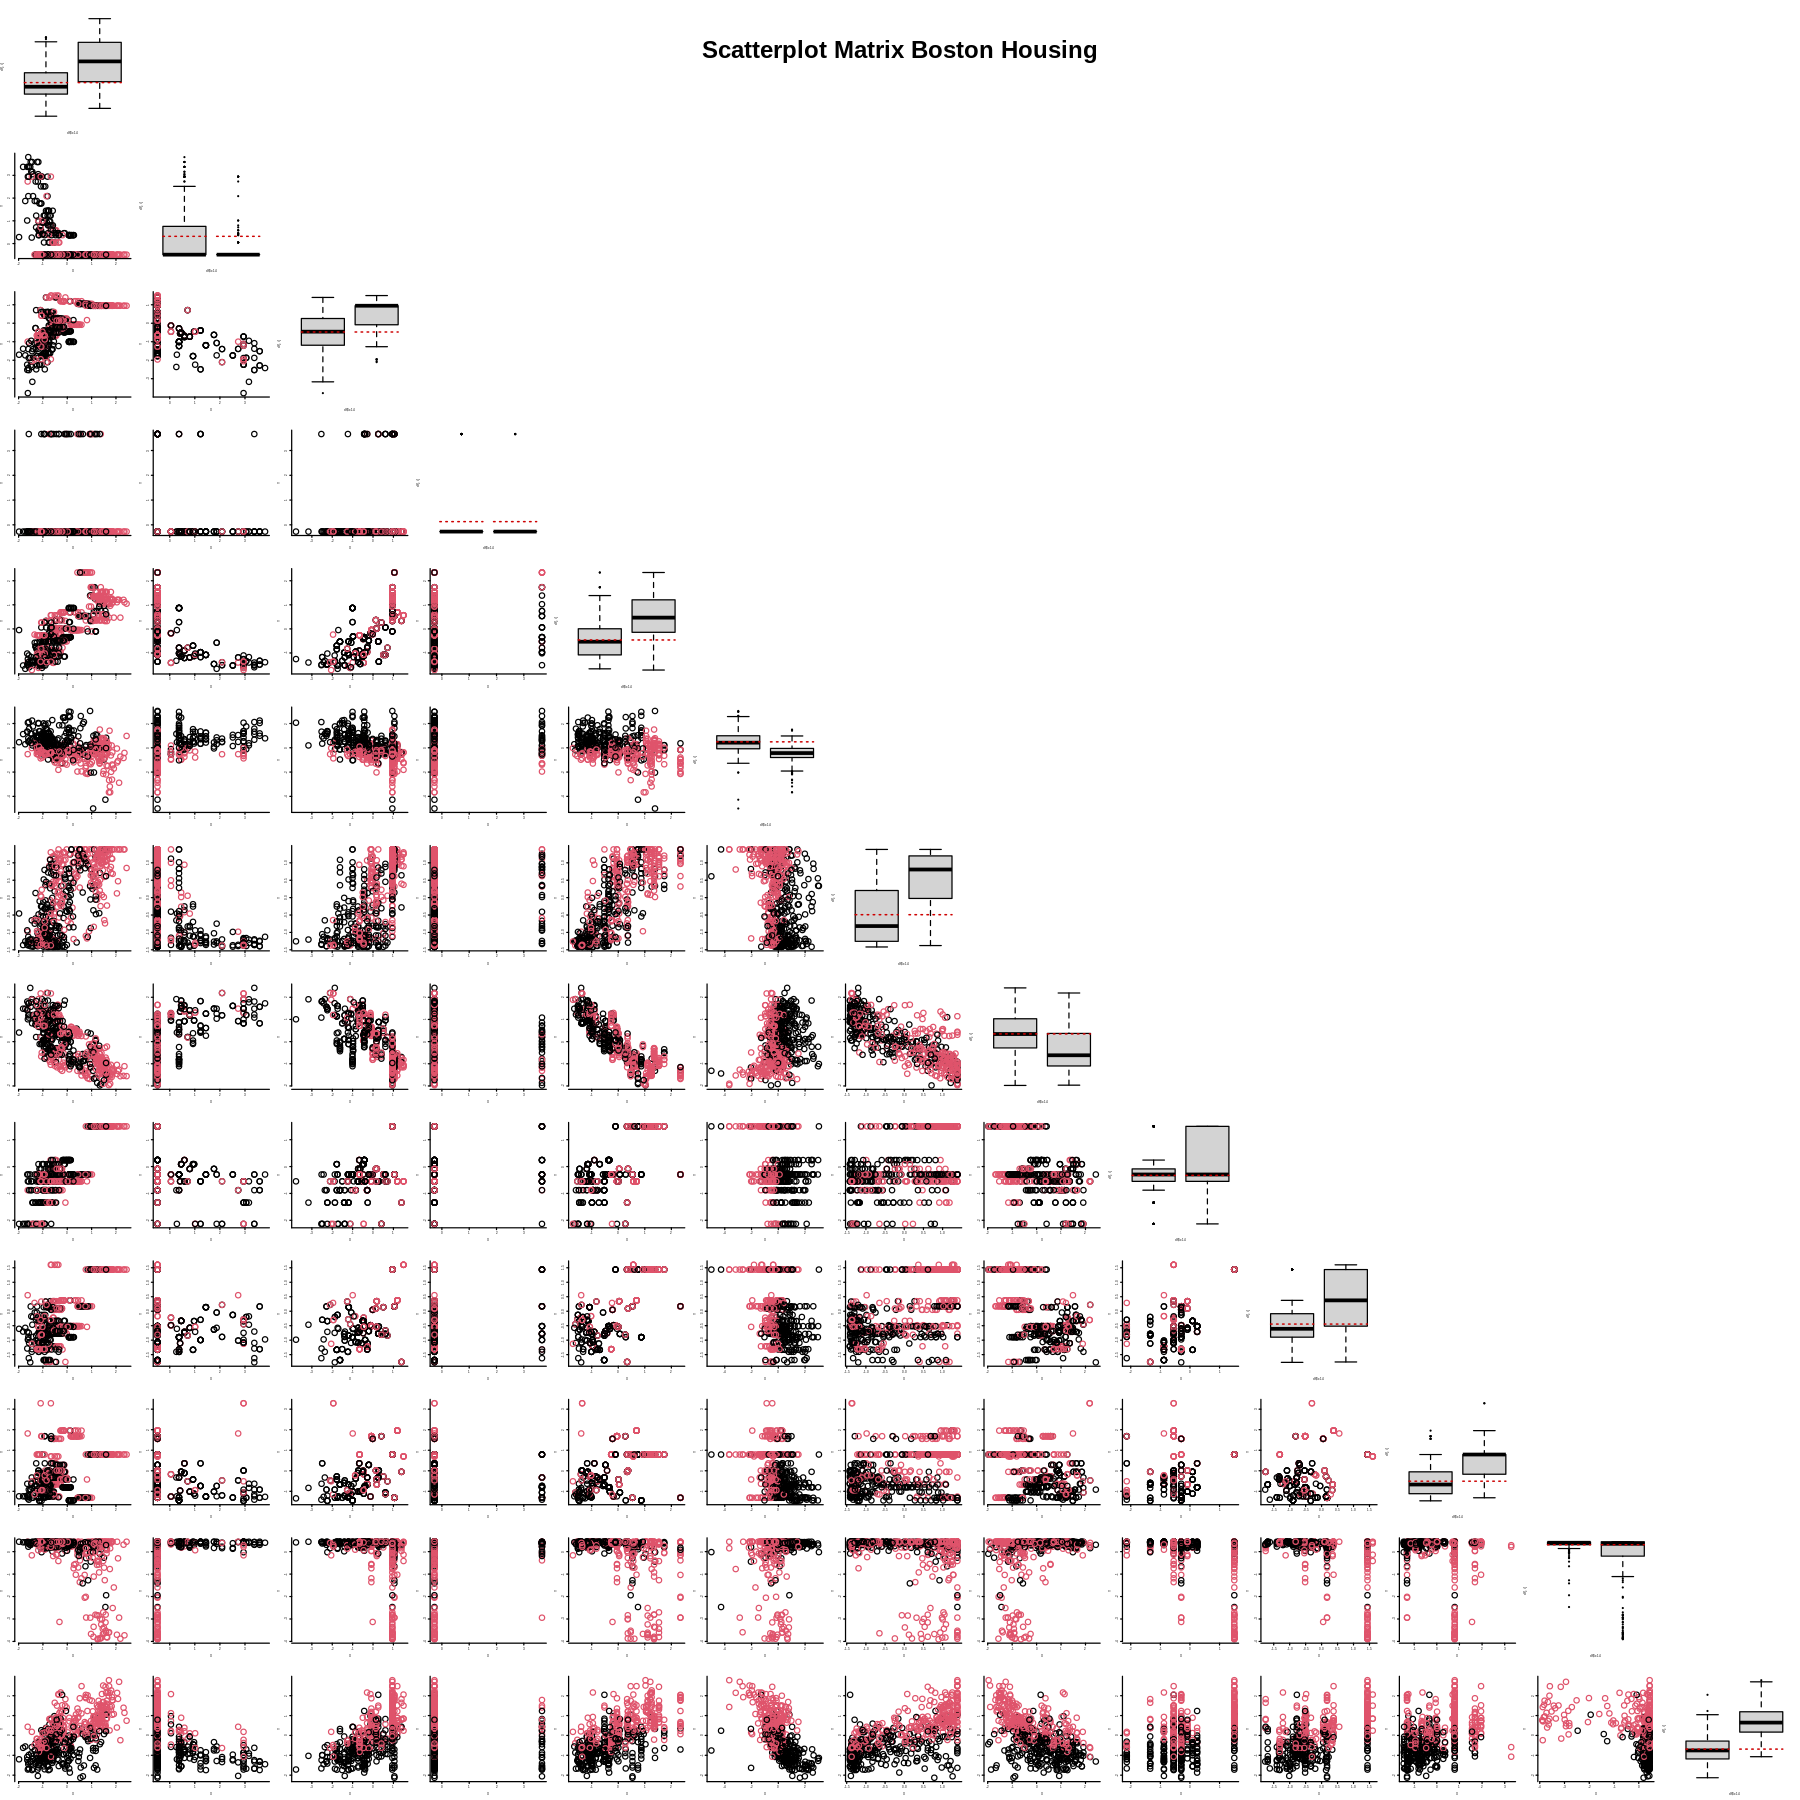

In [16]:
# Set the size of the plot
options(repr.plot.width = 15, repr.plot.height = 15)

# Subset the data
z1 <- df[df$x14 == 1, ]
z2 <- df[df$x14 == 2, ]

# Calculate means for the subsets
m1 <- colMeans(z1)
m2 <- colMeans(z2)

# Initialize plot layout
par(mfrow = c(13, 13), cex = 0.15)

# Create a scatterplot matrix
for (i in 1:13) {
    for (j in 1:13) {
        if (i == j) {
            boxplot(df[, i] ~ df$x14, at = 1:2, axes = FALSE)
            lines(c(0.6, 1.4), c(m1[i], m1[i]), lty = "dotted", lwd = 1.2, col = "red3")
            lines(c(1.6, 2.4), c(m1[i], m1[i]), lty = "dotted", lwd = 1.2, col = "red3")
        }
        if (i > j) {
            plot(df[, c(j, i)], col = as.numeric(df$x14), xlab = "X", ylab = "Y", cex = 4, axes = FALSE)
            axis(1, at = pretty(df[, j]))
            axis(2, at = pretty(df[, i]))
        }
        if (i < j) {
            plot(1, type = "n", axes = FALSE, xlab = "", ylab = "", main = "")
        }
    }
}

# Add a title to the plot
title(main = list("Scatterplot Matrix Boston Housing", cex = 8), line = -16, outer = TRUE)

Observasi:

Variabel x4 tidak memiliki pengaruh signifikan terhadap pengelompokan distrik. Oleh karena itu, kita tidak akan menggunakan variabel ini untuk klasifikasi.

In [17]:
# Drop x4 from df
df <- df[, -4]
head(df)

,x1,x2,x3,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.9812674,0.2845483,-1.7026586,-0.04899171,0.4576943,-0.4565267,0.4086998,-2.1348765,-0.6081371,-1.2427973,0.4406159,-1.2015004,1
2,-1.3043481,-0.4872402,-0.2629788,-0.73021967,0.2466931,0.1314421,0.7688007,-1.3425573,-1.1163074,-0.6697918,0.4406159,-0.3995573,1
3,-1.3046869,-0.4872402,-0.2629788,-0.73021967,1.2475534,-0.6007692,0.7688007,-1.3425573,-1.1163074,-0.6697918,0.3960351,-1.4285190,1
4,-1.2257286,-0.4872402,-1.7772063,-0.84801420,1.0127782,-1.0209311,1.1380675,-0.8790803,-1.3339352,-0.2769868,0.4157514,-1.7251690,1
5,-0.8753211,-0.4872402,-1.7772063,-0.84801420,1.2003437,-0.8125735,1.1380675,-0.8790803,-1.3339352,-0.2769868,0.4406159,-1.1234103,1
6,-1.2632149,-0.4872402,-1.7772063,-0.84801420,0.2591629,-0.6787640,1.1380675,-0.8790803,-1.3339352,-0.2769868,0.4101651,-1.1498869,1


# **LDA Model (Manual)**

In [18]:
# Separating feature and target
X <- df[, 1:12]
y <- df[, 13]

In [19]:
# Split the data into training (80%) and test set (20%)
set.seed(42)
splitIndex <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[splitIndex, ]
y_train <- y[splitIndex]
X_test <- X[-splitIndex, ]
y_test <- y[-splitIndex]

In [20]:
dim(X_train)
dim(X_test)
length(y_train)
length(y_test)

[1] 405  12

[1] 101  12

[1] 405

[1] 101

In [ ]:
# # Calculate APER using training data
# d_train = dist(X_train, "euclidean")
# w_train = hclust(d_train, method = "ward.D")
# tree_train = cutree(w_train, 2)

# t1_train = subset(X_train, tree_train == 1)
# t2_train = subset(X_train, tree_train == 2)

# m1_train = colMeans(t1_train)
# m2_train = colMeans(t2_train)
# m_train = (m1_train + m2_train)/2
# s_train = ((nrow(t1_train) - 1) * cov(t1_train) + (nrow(t2_train) - 1) * cov(t2_train))/(nrow(X_train) - 2)
# alpha_train = solve(s_train) %*% (m1_train - m2_train)
# mis1_train = sum((t1_train - m_train) %*% alpha_train < 0)
# mis2_train = sum((t2_train - m_train) %*% alpha_train > 0)
# aper_train = (mis1_train + mis2_train)/nrow(X_train)
# alph_train = (X_train - matrix(m_train, nrow(X_train), ncol(X_train), byrow = TRUE)) %*% alpha_train

# # Calculate AER using test data
# n_test = nrow(X_test)
# i_test = 0
# mis1_test = 0
# mis2_test = 0
# corr1_test = 0
# corr2_test = 0
# while (i_test < n_test) {
#     i_test = i_test + 1
#     xi_test = subset(X_test, 1:n_test != i_test)
#     treei_test = subset(tree_train, 1:n_test != i_test)
#     t1_test = subset(xi_test, treei_test == 1)
#     t2_test = subset(xi_test, treei_test == 2)
#     m1_test = colMeans(t1_test)
#     m2_test = colMeans(t2_test)
#     m_test = (m1_test + m2_test)/2
#     s_test = ((nrow(t1_test) - 1) * cov(t1_test) + (nrow(t2_test) - 1) * cov(t2_test))/(nrow(X_test) - 2)
#     alpha_test = solve(s_test) %*% (m1_test - m2_test)
#     mis1_test = mis1_test + (tree_train[i_test] == 1) * ((X_test[i_test, ] - m_test) %*% alpha_test < 0)
#     mis2_test = mis2_test + (tree_train[i_test] == 2) * ((X_test[i_test, ] - m_test) %*% alpha_test > 0)
#     corr1_test = corr1_test + (tree_train[i_test] == 1) * ((X_test[i_test, ] - m_test) %*% alpha_test > 0)
#     corr2_test = corr2_test + (tree_train[i_test] == 2) * ((X_test[i_test, ] - m_test) %*% alpha_test < 0)
# }

# aer_test = (mis1_test + mis2_test)/nrow(X_test)
# print(paste("APER (Training):", aper_train))
# print(paste("AER (Test):", aer_test))

Akurasinya ada yg make aper ada yg make aer. but overall ini linear discriminant analysis

# **LDA Model (MASS Package)**

In [21]:
# Fit the model using training data
model <- lda(y_train ~ ., data = data.frame(X_train, y_train))
model

Call:
lda(y_train ~ ., data = data.frame(X_train, y_train))

Prior probabilities of groups:
        1         2 
0.4962963 0.5037037 

Group means:
          x1         x2         x3         x5         x6         x7         x8
1 -0.4069190  0.2505239 -0.3867715 -0.4281878  0.4740915 -0.4466734  0.3089515
2  0.4616961 -0.3043818  0.4779481  0.4725386 -0.5145821  0.4915727 -0.3522528
          x9        x10        x11        x12        x13
1 -0.3140989 -0.4195578 -0.4571014  0.3014168 -0.6749008
2  0.3560330  0.4461578  0.5090341 -0.2595722  0.6790891

Coefficients of linear discriminants:
            LD1
x1  -0.15937031
x2   0.03697283
x3   0.02736155
x5   0.50766351
x6  -0.20559846
x7   0.43944265
x8   0.76140638
x9  -0.12461919
x10  0.14105685
x11  0.49977392
x12 -0.13785286
x13  0.93639024

In [22]:
# Make predictions on test data
predictions <- predict(model, data.frame(X_test))
predictions

,1,2
7,0.476848325,0.5231516751
8,0.029018616,0.9709813840
13,0.420306731,0.5796932689
15,0.061689517,0.9383104827
18,0.021804394,0.9781956061
19,0.144012288,0.8559877116
21,0.001773158,0.9982268422
23,0.006558374,0.9934416257
26,0.005282496,0.9947175044
29,0.021860957,0.9781390429


In [23]:
# Evaluate the accuracy of the model
accuracy <- mean(predictions$class == y_test)
accuracy

[1] 0.8514851